In [1]:
dir = dirname(pwd()) * "/PROJECT"
include(dir * "/functions/Preamble.jl")
dir = dirname(pwd()) * "/PROJECT"

t0 = now()

  Activating project at `C:\Users\conno\Documents\CAMBRIDGE\Part III\Comp Project\JULIA\PROJECT`

Num threads: 4

2023-05-15T03:06:10.224

In [2]:
include(dir * "/functions/DataStructure.jl")
include(dir * "/functions/Bases.jl")
include(dir * "/functions/Plotting.jl")
include(dir * "/functions/Statistics.jl")
include(dir * "/functions/Simulation.jl")
include(dir * "/functions/SingleVertexApproxns.jl")

include(dir * "/functions/simulationFunctions/GroundStates.jl")

## Setup

In [3]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 20
rcParams["font.family"] = "Times New Roman"
PyPlot.matplotlib[:rc]("mathtext",fontset="stix")
PyPlot.matplotlib[:rc]("font",family="STIXGeneral",style="normal",size=18)

font = "Times New Roman"
fontsize = 20

20

## Demon

In [4]:
filefun = (method) ->  dir * "/data/" * method * ".jld";

method = "MicroDiff"
file = filefun(method);

In [5]:
load(file)

Dict{String, Any} with 20 entries:
  "Temperature"        => Any[]
  "NumFlippedEdges"    => [1]
  "twoFlip"            => true
  "C"                  => [0.0513718; 9.42815e-7;;; 0.0520848; 9.48416e-7;;; 0.…
  "alpha"              => [0.975273; 0.00675636;;; 0.97847; 0.00649408;;; 0.982…
  "VACF"               => [0.81541; -0.101291; … ; 0.0; 0.02;;; 0.81861; -0.103…
  "num_histories"      => 50
  "D"                  => [0.137233; 0.00396346;;; 0.139701; 0.0038787;;; 0.138…
  "basis"              => (Cell[Cell(false, 0.0, [0.0, 0.0], UInt32[], UInt32[0…
  "tau"                => 2:100
  "Size"               => [16, 16]
  "EnergyQuantisation" => 4
  "runtime"            => 2000
  "Dself"              => 1.0
  "gamma"              => [-1.78103; 0.00183141;;; -1.87955; 0.00224205;;; -1.8…
  "Fields"             => 0.0:0.25:2.0
  "MSD"                => [0.0; 0.81541; … ; 1159.83; 1162.14;;; 0.0; 0.81861; …
  "lambda"             => 1.0
  "therm_runtime"      => 16
  "xi"                

In [6]:
λ = load(file, "lambda")
ξ = load(file, "xi")
twoFlip = load(file, "twoFlip")
isSpinIce = (λ==0 && ξ==1)
δE = (λ==0) ? 8*ξ : 4*λ

4.0

In [7]:
z = Coordination(load(file, "basis"))
Dself = load(file, "Dself")

1.0

In [8]:
if twoFlip
    Kfun = (T, h) -> Dself ./ 2 .* (0.5 .* δE ./ T).^2 .* ExcitationDensity(T, h, z) .* (1 .- AllExcitationDensity(T, h, z)) .* (1 .- Magnetisation(T, h, z)) ./ 2 # additional magnetisation factor for +-+- bond percolation
else
    Kfun = (T, h) -> Dself ./ 2 .* (0.5 .* δE ./ T).^2 .* ExcitationDensity(T, h, z) .* (1 .- AllExcitationDensity(T, h, z))
end

Cfun = (T, h) -> 2/z .* (λ^2 .* sech.(λ ./T).^2 + 2 * h^2 .* sech.(h ./T).^2) ./ T.^2

if twoFlip
    Dfun = (T, h) -> Kfun(T, h) ./ Cfun(T, h)
else
    Dfun = (T, h) -> Kfun(T, h) ./ HeatCapacity(T, h, z)
end

#68 (generic function with 1 method)

In [9]:
𝒽 = load(file, "Fields");
colors = jetmap(length(𝒽));

In [10]:
if method == "DemonKubo" 
    Tobs = load(file, "ObservedTemperature");
    TobsStd = load(file, "ObservedTemperatureStd");
    T = load(file, "TargetTemperature");

    figure()
    for i in eachindex(𝒽)
        plotWithError(Tobs[:,i], T, colors[i], ".", TobsStd[:,i])
    end
    xlim([0,10.1])
    ylim([0,10.1])
    savefig("figs/Demon_Kubo_Temperature.png")
    # Just to check that out temperature estimates aren't too far off
else
    Tobs = load(file, "Temperature");
    Tobs = reshape(Tobs, size(Tobs)..., 1)
    TobsStd = zeros(size(Tobs));
end;

# Comparing two methods

In [81]:
file = filefun("DemonKubo")

λ = load(file, "lambda")
ξ = load(file, "xi")
twoFlip = load(file, "twoFlip")
isSpinIce = (λ==0 && ξ==1)
δE = (λ==0) ? 8*ξ : 4*λ

z = Coordination(load(file, "basis"))
Dself = load(file, "Dself")


q_GS = (mod(z,2)==0) ? 0 : 1
q_min = (mod(z,2)==0) ? 2 : 3

E_min = (λ==0) ? (q_min^2-q_GS^2)*ξ : 2*λ

2.0

In [126]:
Variable = "Capacity"

Tobs = load(file, "ObservedTemperature");
TobsStd = load(file, "ObservedTemperatureStd");
Texp = load(file, "TargetTemperature");
T = load(filefun("MicroKubo"), "Temperature");

D_D = load(file, Variable);
DStd_D = load(file, Variable*"Std");

D_M = load(filefun("MicroKubo"), Variable);
DStd_M = load(filefun("MicroKubo"), Variable*"Std");


𝒽 = load(filefun("MicroKubo"), "Fields");
colors = jetmap(length(𝒽));

In [127]:
Cfun = (T, h) -> HeatCapacity(T, h, z)

Kfun = (T, h) -> 2/z * Dself .* (E_min ./ T).^2 .* ExcitationDensity(T, h, z) .* (1 .- AllExcitationDensity(T, h, z))

Dfun = (T, h) ->  Kfun(T,h) ./ Cfun(T,h)

#270 (generic function with 1 method)

In [128]:
f_λ = 1
f_h = 0

A_λ = (T, h) -> ExcitationDensity(T, h, z) .* (1 .- AllExcitationDensity(T, h, z))
A_h = (T, h) -> Magnetisation(T, h, z) .* (1 .- Magnetisation(T, h, z))

aQ = (T, h) -> (1 .- Magnetisation(T, h, z)) .* 0.5

Cfun = (T, h) -> 2/z * ((λ ./ T).^2 .* sech.(λ ./T).^2 + 2 * (h ./ T).^2 .* sech.(h ./ T).^2)
Kfun = (T, h) -> 2/z .* (f_λ .* A_λ(T,h) .* (2 .* λ ./ T).^2 + f_h .* A_h(T,h) .* (2 .* h ./ T).^2) .* aQ(T, h)

#280 (generic function with 1 method)

In [129]:
Kfun = (T, h) -> 2/z .* A_λ(T,h) .* ((2 .* λ ./ T).^2) .* 1/2

#282 (generic function with 1 method)

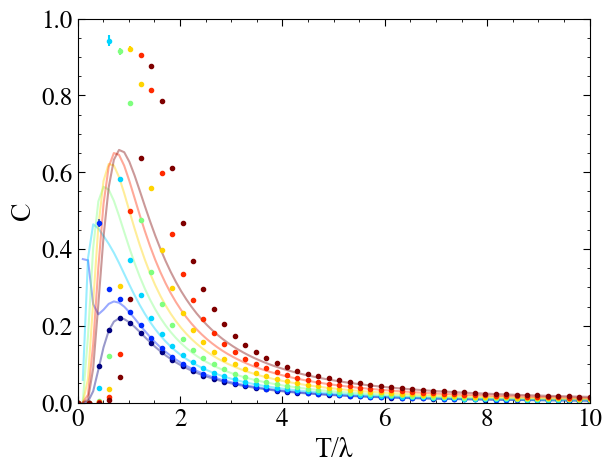

In [138]:
idx_D = 1:size(Tobs, 1)
idx_M = 1:length(T)

Xrange = [0,10]
Yrange = [0,1.0]
Tfit = range(Xrange[1], Xrange[2], length=100)

f = figure()
for i in eachindex(𝒽)
    plot(Tfit, Cfun(Tfit,𝒽[i]), color=colors[i], alpha=0.4)
    
    plotWithError(D_M[idx_M,i], T[idx_M], colors[i], ".", "Microcanonical" , DStd_M[idx_M,i])
    #plotWithError(D_D[idx_D,i], Tobs[idx_D,i], :darkorchid, ".", "Demons", 1/3 .* DStd_D[idx_D,i], TobsStd[idx_D,i])
end

xlim(Xrange)
ylim(Yrange)

xlabel("T/λ", fontname=font, fontsize=fontsize) # λξ
ylabel("C", fontname=font, fontsize=fontsize)

ax = gca()
ax.tick_params(which="both", length=5, top="on", right="on", direction="in")
ax.tick_params(which="major", length=5)
ax.tick_params(which="minor", length=2)
minorticks_on()

f.subplots_adjust(bottom=0.15, left=0.15, right=0.95, top=0.95)

#legend(frameon=false)

savefig("figs/" * Variable * ".pdf")

In [125]:
print(𝒽[3])

0.3333333333333333

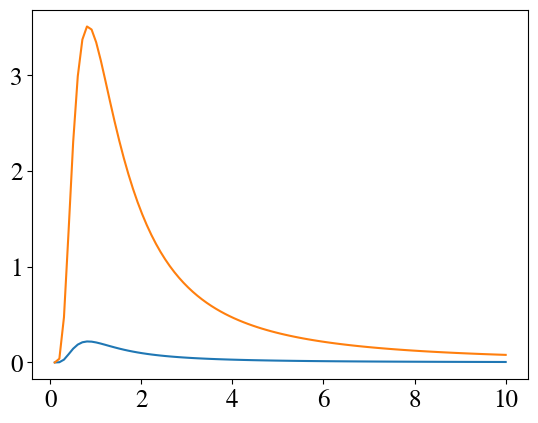

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000D538BD90>

In [58]:
plot(Tfit, HeatCapacity(Tfit, 0, z))
plot(Tfit, 2/z .* (8 ./ Tfit).^2 .* ExcitationDensity(Tfit, 0, z) .* (1 .- AllExcitationDensity(Tfit, 0, z)))

In [18]:
print(2 / log(prod(load(file, "Size"))))

0.6213349345596119

## Diffn in Field

In [197]:
Variable = "MSDExponent"

α = load(filefun("MicroDiff"), "alpha");
γ = load(filefun("MicroDiff"), "gamma");
T = load(filefun("MicroDiff"), "Temperature");

𝒽 = load(filefun("MicroDiff"), "Fields");
colors = jetmap(length(𝒽));

In [198]:
idx = 1:length(T)

1:1

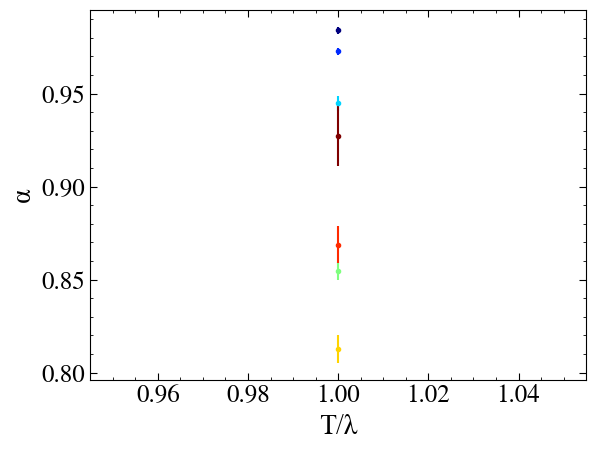

In [199]:
f = figure()
for i in eachindex(𝒽)
    plotWithError(α[1,idx,i], T[idx], colors[i], ".", "" , α[2,idx,i])
end

ax = gca()
ax.tick_params(which="both", length=5, top="on", right="on", direction="in")
ax.tick_params(which="major", length=5)
ax.tick_params(which="minor", length=2)
minorticks_on()

xlabel("T/λ", fontname=font, fontsize=fontsize)
ylabel("α", fontname=font, fontsize=fontsize)

savefig("figs/alpha_field.pdf")

In [200]:
print(α[1,:,:])

[0.9839222122572663 0.9726753135160707 0.9447582066987612 0.8545223921987066 0.8128424539502546 0.8688654862174684 0.9273236313579213]

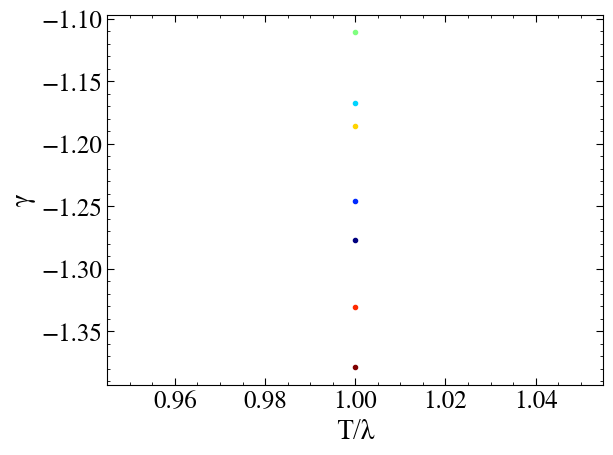

In [201]:
f = figure()
for i in eachindex(𝒽)
    plotWithError(γ[1,idx,i], T[idx], colors[i], ".", "" , γ[2,idx,i])
end

ax = gca()
ax.tick_params(which="both", length=5, top="on", right="on", direction="in")
ax.tick_params(which="major", length=5)
ax.tick_params(which="minor", length=2)
minorticks_on()

xlabel("T/λ", fontname=font, fontsize=fontsize)
ylabel("γ", fontname=font, fontsize=fontsize)

savefig("figs/gamma_field.pdf")

In [202]:
x = load(filefun("MicroDiff"), "trajectories");

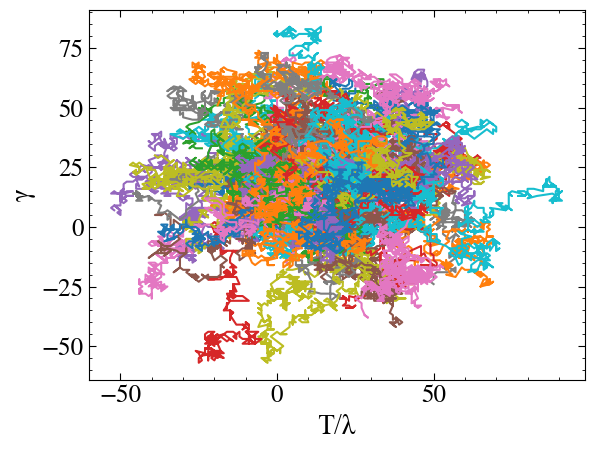

In [210]:
f = figure()

figure()
for p in 1:size(x[1][1][end], 2)
    plot(x[1][1][end][1,p,:], x[1][1][end][2,p,:])
end

ax = gca()
ax.tick_params(which="both", length=5, top="on", right="on", direction="in")
ax.tick_params(which="major", length=5)
ax.tick_params(which="minor", length=2)
minorticks_on()

xlabel("T/λ", fontname=font, fontsize=fontsize)
ylabel("γ", fontname=font, fontsize=fontsize)

savefig("figs/gamma_field.pdf")

## Diffn Comparison

In [23]:
tau = 1:100

1:100

In [24]:
Variable = "MSD"

MSD_sqrIce = load(filefun("TMP/MicroDiff_sqrIce"), "MSD");
MSD_sqrTrc = load(filefun("TMP/MicroDiff_sqrTrc"), "MSD");
MSD_hexIce = load(filefun("TMP/MicroDiff_hexIce"), "MSD");
MSD_hexTrc = load(filefun("TMP/MicroDiff_hexTrc"), "MSD");

In [25]:
msd_sqrIce = mean(MSD_sqrIce[:,:,1], dims=2);
msd_sqrTrc = mean(MSD_sqrTrc[:,:,1], dims=2);
msd_hexIce = mean(MSD_hexIce[:,:,1], dims=2);
msd_hexTrc = mean(MSD_hexTrc[:,:,1], dims=2);

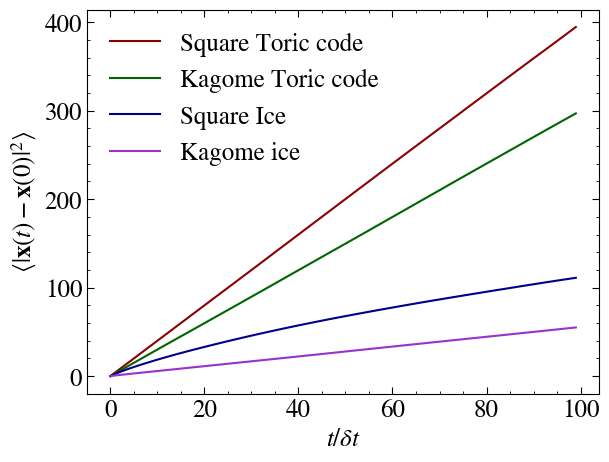

In [26]:
f = figure()
plot(msd_sqrTrc[tau], color=:darkred, label = "Square Toric code")
plot(msd_hexTrc[tau], color=:darkgreen, label = "Kagome Toric code")
plot(msd_sqrIce[tau], color=:darkblue, label = "Square Ice")
plot(msd_hexIce[tau], color=:darkorchid, label = "Kagome ice")

    
xlabel("\$t/\\delta t\$")
ylabel("\$\\langle|\\mathbf{x}(t)-\\mathbf{x}(0)|^2\\rangle\$")

ax = gca()
ax.tick_params(which="both", length=5, top="on", right="on", direction="in")
ax.tick_params(which="major", length=5)
ax.tick_params(which="minor", length=2)
minorticks_on()

legend(frameon=false)

f.subplots_adjust(bottom=0.15, left=0.15, right=0.95, top=0.95)

savefig("figs/" * Variable * ".pdf")

In [27]:
Variable = "VACF"

VACF_sqrIce = load(filefun("TMP/MicroDiff_sqrIce"), "VACF");
VACF_sqrTrc = load(filefun("TMP/MicroDiff_sqrTrc"), "VACF");
VACF_hexIce = load(filefun("TMP/MicroDiff_hexIce"), "VACF");
VACF_hexTrc = load(filefun("TMP/MicroDiff_hexTrc"), "VACF");

In [28]:
vacf_sqrIce = mean(VACF_sqrIce[:,:,1], dims=2);
vacf_sqrTrc = mean(VACF_sqrTrc[:,:,1], dims=2);
vacf_hexIce = mean(VACF_hexIce[:,:,1], dims=2);
vacf_hexTrc = mean(VACF_hexTrc[:,:,1], dims=2);

vacf_sqrIce[2:end] .*= sign(vacf_sqrIce[2]);
vacf_sqrTrc[2:end] .*= sign(vacf_sqrTrc[2]);
vacf_hexIce[2:end] .*= sign(vacf_hexIce[2]);
vacf_hexTrc[2:end] .*= sign(vacf_hexTrc[2]);

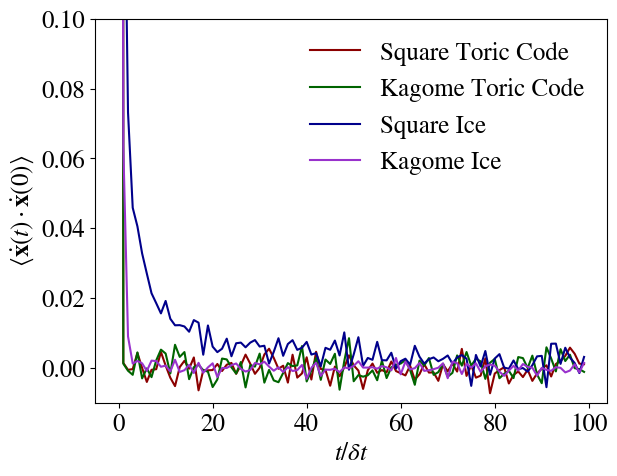

In [29]:
f = figure()
plot(vacf_sqrTrc[tau], color=:darkred, label = "Square Toric Code")
plot(vacf_hexTrc[tau], color=:darkgreen, label = "Kagome Toric Code")
plot(vacf_sqrIce[tau], color=:darkblue, label = "Square Ice")
plot(vacf_hexIce[tau], color=:darkorchid, label = "Kagome Ice")


ylim([-0.01,0.1])

xlabel("\$t/\\delta t\$")
ylabel("\$\\langle \\dot{\\mathbf{x}}(t) \\cdot \\dot{\\mathbf{x}}(0) \\rangle\$")

legend(frameon=false)

f.subplots_adjust(bottom=0.15, left=0.15, right=0.95, top=0.95)

savefig("figs/" * Variable * ".pdf")